In [1]:
import pandas as pd # для работы с данными
import numpy as np
# для ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# для визуализации
import matplotlib.pyplot as plt


In [2]:
# Читаем данные из датасета
df = pd.read_csv("heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


"303 non-null" значит, что у нас
нет "пустых" значений и нам не нужно ничего заменять

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Мы получили некоторые значения из нашего датасета. Внимание привлекает минимальный возраст - 29 лет.
Датасет сравнительно небольшой, всего 303 записи. Но этого будет достаточно для анализа.
Теперь посмотрим на матрицу корреляции.

<Figure size 1152x576 with 0 Axes>

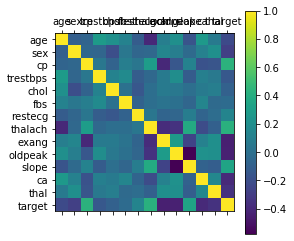

In [5]:
plt.figure(figsize=(16, 8))
plt.matshow(df.corr())
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()
plt.show()

Теперь посмотрим гистограммы для каждого значения.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F94619A88>,
      dtype=object)

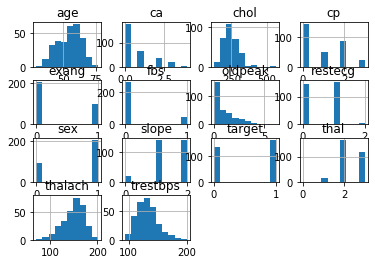

In [6]:
df.hist()

Исходя из гистограмм выше, можно увидеть что у каждого значения свой диапазон распределения.
Поэтому мы будем использовать масштабирование.

Посмотрим теперь на количество больных и здоровых по признаку возраста.

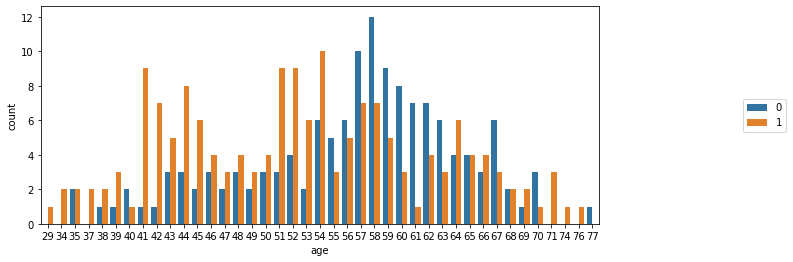

In [7]:
plt.figure(figsize=(10,4))
g = sns.countplot(data = df, x = 'age', hue = 'target')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

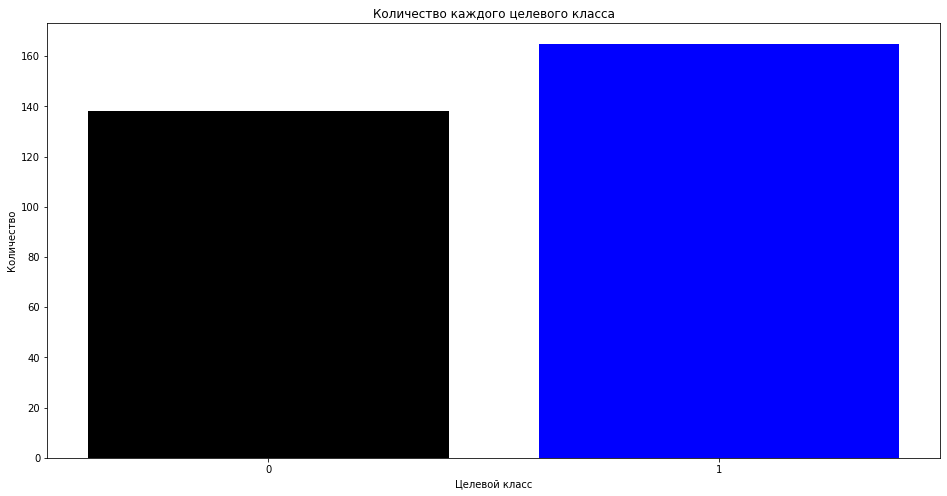

In [8]:
plt.figure(figsize=(16, 8))
plt.bar(df['target'].unique(), df['target'].value_counts(), color=['blue', 'black'])
plt.xticks([0, 1])
plt.xlabel('Целевой класс')
plt.ylabel('Количество')
plt.title('Количество каждого целевого класса')
plt.show()

Пора приступить непосредственно к ML!

In [9]:
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
sscal = StandardScaler()
scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[scale_col] = sscal.fit_transform(df[scale_col])

Теперь необходимо импортировать train_test_split,
чтобы разделить наш датасет на набор обучения и тестирования.

In [11]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Чтобы достигнуть лучшего результата, будем рассматривать
различные значения K-Neighbors, потому что оценка зависит
от разных значений K-Neighbors, которые мы выбираем.

In [12]:
kn = []
for k in range(1, 21):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    kn.append(knc.score(X_test, y_test))

Теперь мы имеем график с различными значениями K-Neighbors и можем проанализировать, для какого значения
мы получили лучшие баллы (оценки).

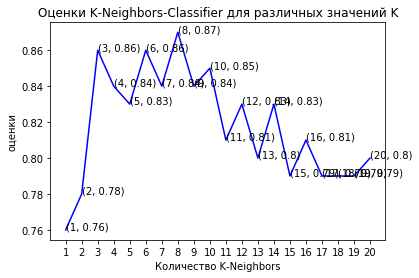

In [13]:
plt.plot([k for k in range(1, 21)], kn, color='blue')
for i in range(1, 21):
    plt.text(i, kn[i - 1], (i, kn[i - 1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Количество K-Neighbors')
plt.ylabel('оценки')
plt.title('Оценки K-Neighbors-Classifier для различных значений K')
plt.show()

При исследовании методом SVC использовалась статья - https://habr.com/ru/post/105220/
И снова для достижения лучшего результата нам необходимо построить несколько значений, используя различные ядра (kernels).

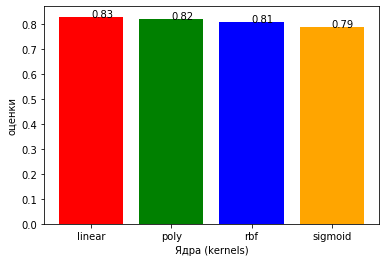

In [14]:
svc = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svccl = SVC(kernel=kernels[i])
    svccl.fit(X_train, y_train)
    svc.append(svccl.score(X_test, y_test))
colors = ['red', 'green', 'blue', 'orange', 'yellow']
plt.bar(kernels, svc, color=colors)
for i in range(len(kernels)):
    plt.text(i, svc[i], svc[i])
plt.xlabel('Ядра (kernels)')
plt.ylabel('оценки')
plt.show()

DTC метод

Мы будем использовать метод DTC для моделирования. Нам понадобится max_features, чтобы получить наивысшую точность

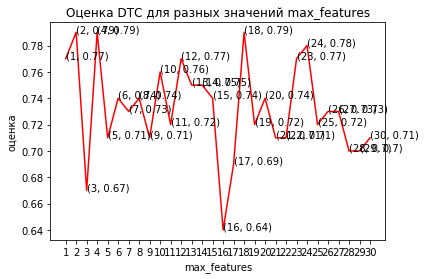

In [15]:
dt = []
for i in range(1, len(X.columns) + 1):
    dtc = DecisionTreeClassifier(max_features=i, random_state=0)
    dtc.fit(X_train, y_train)
    dt.append(dtc.score(X_test, y_test))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt, color='red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt[i - 1], (i, dt[i - 1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('max_features')
plt.ylabel('оценка')
plt.title('Оценка DTC для разных значений max_features')
plt.show()

Время использовать метод RF (Random Forest)

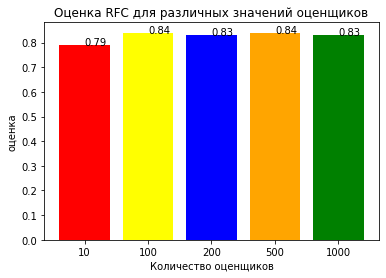

In [16]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
rf = []
est = [10, 100, 200, 500, 1000]
for i in est:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    rf.append(rf_classifier.score(X_test, y_test))
plt.bar([i for i in range(len(est))], rf, color=['red', 'yellow', 'blue', 'orange', 'green'], width=0.8)
for i in range(len(est)):
    plt.text(i, rf[i], rf[i])
plt.xticks(ticks=[i for i in range(len(est))], labels=[str(estimator) for estimator in est])
plt.xlabel('Количество оценщиков')
plt.ylabel('оценка')
plt.title('Оценка RFC для различных значений оценщиков')
plt.show()

In [26]:
print("Оценка KNC = {}%".format(kn[7] * 100))
print("Оценка SVC = {}%".format(svc[0] * 100))
print("Оценка DTC = {}%".format(dt[17] * 100))
print("Оценка RFC = {}%.".format(rf[1] * 100))

Оценка KNC = 87.0%
Оценка SVC = 83.0%
Оценка DTC = 79.0%
Оценка RFC = 84.0%.


Исходя из полученных данных выше, модель имеет точность 88%.

Важные факторы, которые влияют на болезни сердца в любом возрасте, вне зависимости от пола :
1. Боль в груди
2. ВПС (даже исправленные)
3. Количество кровеносных сосудов
4. Стенокардия из-за физических нагрузок

Показатель холестерина менее 200 мг/дл считается желательным для взрослых. 
Показатель между 200 и 239 мг/дл считается погранично высоким, а показатель 240 мг/дл и выше считается опасным для здоровья.

У 25% показатель холестерина не превышает 211 мг/дл, что уже высокий показатель.
Как мы увидели, более чем у 50% значение холестерина в крови 240 мг/дл.
У 75% значение превышает 274 мг/дл, и самый максимальный показатель - 564 мг/дл.

Гиперхолестеринемия - один из основных факторов, приводящих к атеросклерозу. Избыток холестерина накапливается, откладывается на стенках сосудов, поражая коронарные артерии, сосуды, питающие головной мозг, - сонные и позвоночные артерии, а также артерии нижних конечностей. Соответственно, у человека развиваются ишемическая болезнь сердца (ИБС), цереброваскулярная недостаточность, перемежающая хромота и, как крайние проявления, - инфаркт, инсульт, гангрена и ампутация нижних конечностей.
В России, по данным ВОЗ, 60% населения имеют повышенный уровень холестерина.